### Investigate the topics data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from functools import reduce
import ast
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
atel_df = pd.read_csv("../topics/atel_with_topics.csv", index_col=0)
atel_df['topics'] = atel_df['topics'].apply(lambda x: x.split(','))

gcn_df = pd.read_csv("../topics/gcn_with_topics.csv", index_col=0)
gcn_df['topics'] = gcn_df['topics'].apply(ast.literal_eval)

all_df = pd.read_csv('../data/assembled.csv', index_col=0)

labels = pd.read_csv('../data/labels.csv', index_col=0)

In [4]:
df = pd.concat((atel_df, gcn_df)).join(all_df).join(labels)
df = df[['topics', 'date', 'n_cited', 'citation_class']]
df['date'] = pd.to_datetime(df['date'])
df['topics'] = df.topics.apply(lambda x: [y.strip() for y in x])
df = df.reset_index().set_index("date").sort_index()
df

,telegram_index,topics,n_cited,citation_class
date,,,,
1997-12-28,2_atel,"[gamma ray, gamma-ray burst]",0,0
1997-12-28,3_atel,"[gamma ray, gamma-ray burst]",0,0
1998-01-06,4_atel,"[optical, gamma ray, a comment, gamma-ray burst]",0,0
1998-01-12,5_atel,"[optical, gamma-ray burst]",0,0
1998-01-18,6_atel,"[optical, gamma-ray burst]",0,0
...,...,...,...,...
2023-05-10,16033_atel,"[gamma ray, gev, agn, blazar, quasar]",0,0
2023-05-12,16034_atel,"[optical, supernovae]",0,0
2023-05-12,16035_atel,"[gamma ray, gev, request for observations, agn...",0,0


In [112]:
df_e = df.explode("topics")

In [18]:
topics_by_class = []

for i, g in df_e.groupby("citation_class"):
    
    top_10_topics = g.topics.value_counts().iloc[:8].reset_index()
    top_10_topics['class'] = i
    
    topics_by_class.append(top_10_topics)

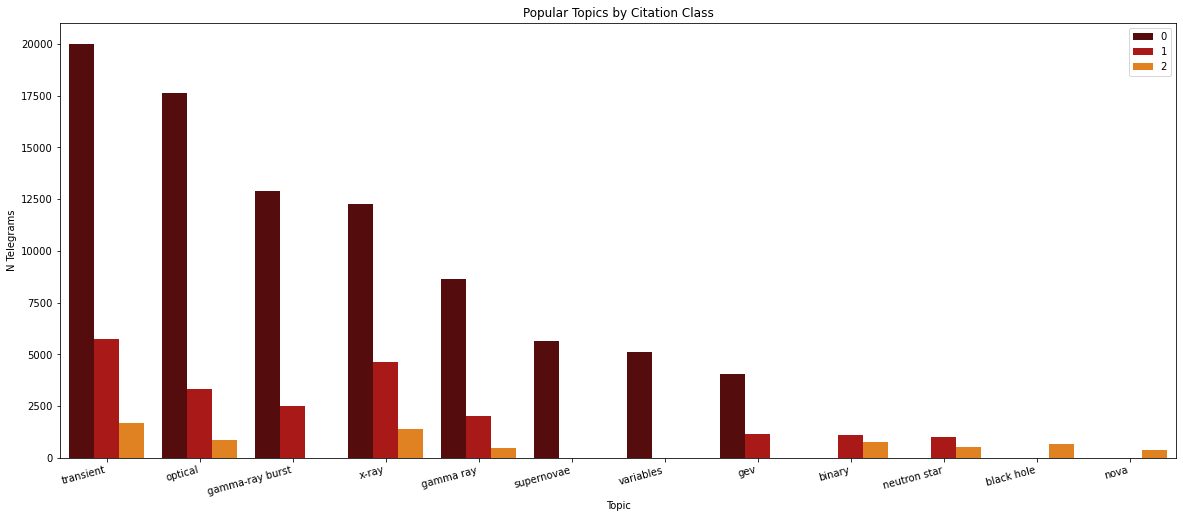

In [19]:
plt.rcParams["figure.figsize"] = (20, 8)
sns.barplot(x='index', y='topics', data=pd.concat([pd.DataFrame(topics_by_class[i]) for i in range(3)]), hue='class',
           palette='gist_heat')
plt.xticks(rotation=15, ha='right')
plt.legend(loc='upper right')
plt.title("Popular Topics by Citation Class")
plt.xlabel("Topic")
plt.ylabel("N Telegrams")
plt.show()

In [20]:
topics_by_class = []

for i, g in df_e.groupby("citation_class"):
    
    top_10_topics = g.topics.value_counts().iloc[-8:].reset_index()
    top_10_topics['class'] = i
    
    topics_by_class.append(top_10_topics)

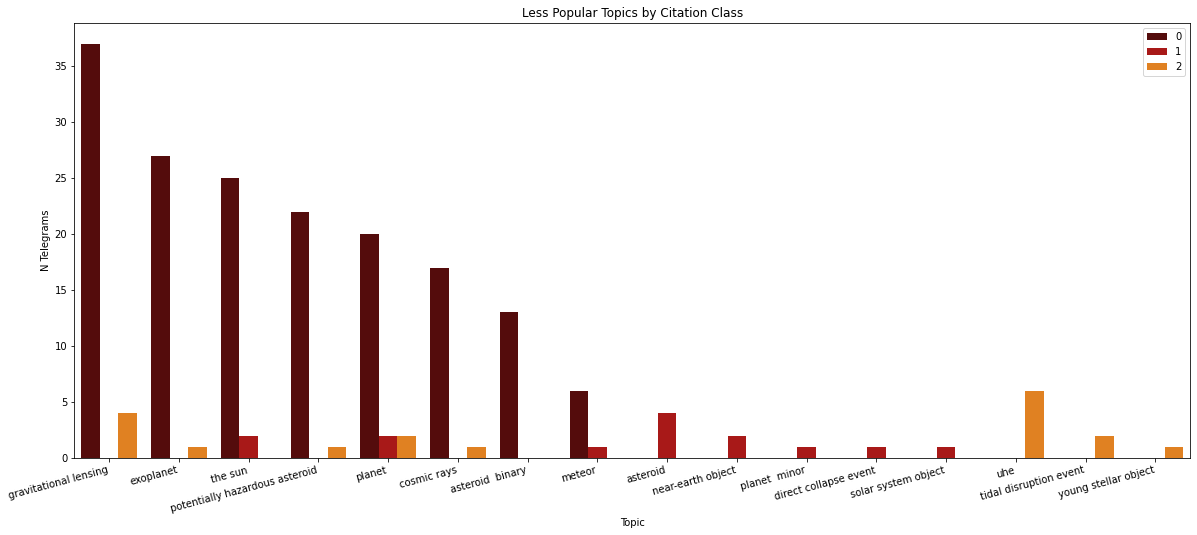

In [22]:
plt.rcParams["figure.figsize"] = (20, 8)
sns.barplot(x='index', y='topics', data=pd.concat([pd.DataFrame(topics_by_class[i]) for i in range(3)]), hue='class',
           palette='gist_heat')
plt.xticks(rotation=15, ha='right')
plt.legend(loc='upper right')
plt.title("Less Popular Topics by Citation Class")
plt.xlabel("Topic")
plt.ylabel("N Telegrams")
plt.show()

In [ ]:
# another one

In [113]:
df_e = df_e[df_e.topics != 'a comment']

In [114]:
df_e = df_e[df_e.topics != 'request for observations']

In [115]:
topics_year = df_e.groupby([df_e.index.year, df_e.topics]).agg({"n_cited": "mean"}).reset_index()

In [117]:
topics_year = topics_year.loc[topics_year.groupby("date").idxmax().n_cited]

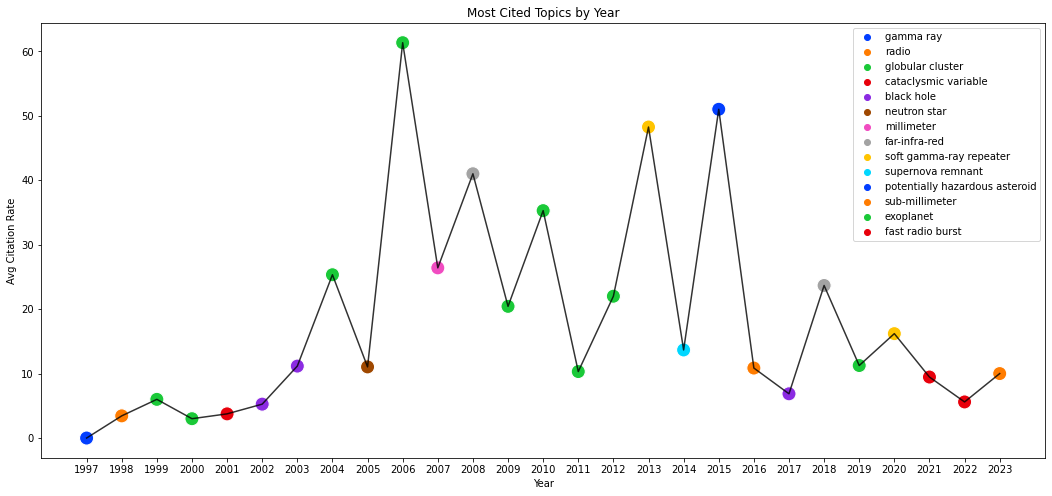

In [147]:
plt.rcParams["figure.figsize"] = (18, 8)
sns.lineplot(y='n_cited', x='date', data=topics_year, color='black', alpha=0.8)
sns.scatterplot(data=topics_year, x='date', y='n_cited', hue='topics', s=200, palette='bright')

plt.legend()
plt.title("Most Cited Topics by Year")
plt.ylabel("Avg Citation Rate")
plt.xlabel("Year")
plt.xticks([*range(topics_year.date.min(), topics_year.date.max()+1)])
plt.show()

In [156]:
# taken from the feature eng part
w = [('transient', 0.10678524347510467),
 ('optical', 0.13429001457589904),
 ('x-ray', 0.16041747745994683),
 ('gamma-ray burst', 0.18876533669166334),
 ('gamma ray', 0.26281253009487565),
 ('supernovae', 0.44586981261760694),
 ('variables', 0.4664462361788905),
 ('gev', 0.544418303890815),
 ('binary', 0.7477418745275889),
 ('agn', 0.7887912131722681),
 ('radio', 0.8164758072836068),
 ('infra-red', 0.823587566211899),
 ('nova', 0.846907872911918),
 ('neutron star', 0.8994010887229666),
 ('black hole', 0.9397717692042796),
 ('blazar', 1.2574638130193687),
 ('cataclysmic variable', 1.329318888049047),
 ('pulsar', 1.3427155969528852),
 ('ultra-violet', 1.5250510656337921),
 ('vhe', 2.018697071727375),
 ('quasar', 2.17605653166158),
 ('star', 2.53559528386518),
 ('neutrinos', 2.5488244766505637),
 ('tev', 3.7103141115799345),
 ('gravitational waves', 5.758640762570035),
 ('magnetar', 8.963755804734399),
 ('millimeter', 9.578915516824015),
 ('soft gamma-ray repeater', 10.177597736625515),
 ('fast radio burst', 14.36837327523602),
 ('young stellar object', 18.205889118932596),
 ('comet', 18.669733427695213),
 ('globular cluster', 20.076357179096906),
 ('tidal disruption event', 20.64188836724048),
 ('asteroid', 22.89959490740741),
 ('uhe', 22.89959490740741),
 ('sub-millimeter', 23.638291517323776),
 ('microlensing event', 31.182427107959022),
 ('supernova remnant', 31.182427107959022),
 ('solar system object', 36.639351851851856),
 ('far-infra-red', 45.79918981481482),
 ('near-earth object', 45.79918981481482),
 ('pre-main-sequence star', 50.53703703703704),
 ('gravitational lensing', 61.06558641975309),
 ('planet  minor', 62.364854215918044),
 ('exoplanet', 91.59837962962963),
 ('the sun', 108.56104252400549),
 ('planet', 122.13117283950618),
 ('potentially hazardous asteroid', 127.44122383252818),
 ('cosmic rays', 133.23400673400675),
 ('asteroid  binary', 225.4729344729345),
 ('meteor', 418.7354497354497),
 ('direct collapse event', 2931.1481481481483)]

In [153]:
df_eg = df_e.groupby('topics').n_cited.mean()

In [160]:
df_w = pd.DataFrame(w, columns=['topics', 'weight']).set_index("topics")

In [162]:
df_t_w = df_w.join(df_eg)

In [164]:
df_t_w=(df_t_w-df_t_w.mean())/df_t_w.std()

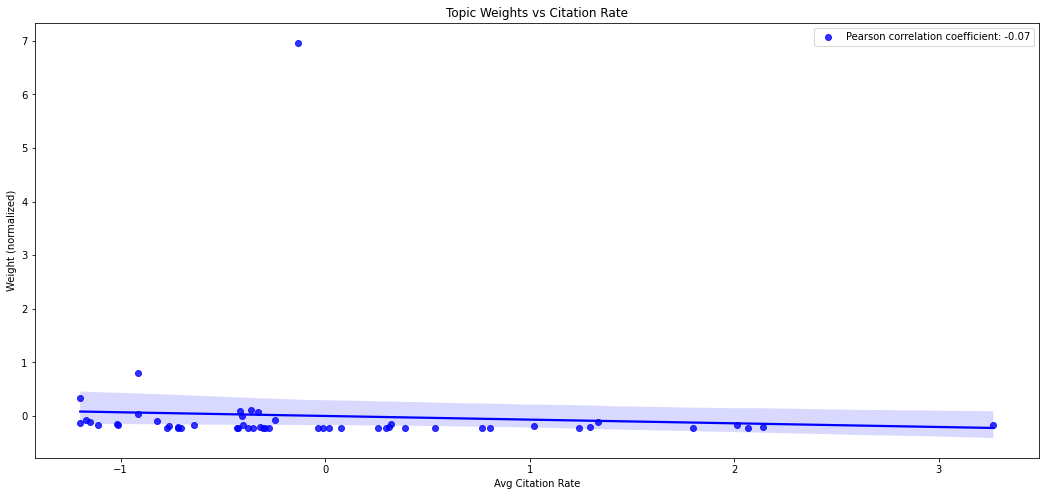

In [179]:
sns.regplot(df_t_w.n_cited.values, df_t_w.weight, color='blue', 
            label=f'Pearson correlation coefficient: {round(np.corrcoef(df_t_w.n_cited.values, df_t_w.weight)[0, 1], 2)}')
plt.legend()
plt.title("Topic Weights vs Citation Rate")
plt.xlabel("Avg Citation Rate")
plt.ylabel("Weight (normalized)")
plt.show()